In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    "Height" : [1.6, 1.6, 1.5, 1.8, 1.5, 1.4],
    "Fav Color": ["Blue", "Green", "Blue", "Red", "Green", "Blue"],
    "Gender": ["Male", "Female", "Female", "Male", "Male", "Female"],
    "Weight": [88, 76, 56, 73, 77, 57]
})
df

,Height,Fav Color,Gender,Weight
0,1.6,Blue,Male,88
1,1.6,Green,Female,76
2,1.5,Blue,Female,56
3,1.8,Red,Male,73
4,1.5,Green,Male,77
5,1.4,Blue,Female,57


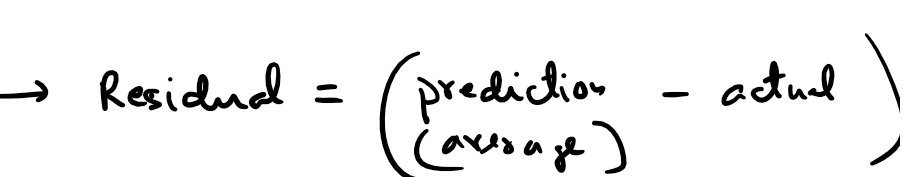

In [3]:
df['pred'] = df['Weight'].mean()

In [6]:
df['residual'] = df['Weight']-df['pred']

In [7]:
df.get

,Height,Fav Color,Gender,Weight,pred,residual
0,1.6,Blue,Male,88,71.166667,16.833333
1,1.6,Green,Female,76,71.166667,4.833333
2,1.5,Blue,Female,56,71.166667,-15.166667
3,1.8,Red,Male,73,71.166667,1.833333
4,1.5,Green,Male,77,71.166667,5.833333
5,1.4,Blue,Female,57,71.166667,-14.166667


In [34]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_leaf_nodes=4)


In [35]:
df = pd.get_dummies(df)
df

,Height,Weight,pred,residual,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Female,Gender_Male
0,1.6,88,71.166667,16.833333,True,False,False,False,True
1,1.6,76,71.166667,4.833333,False,True,False,True,False
2,1.5,56,71.166667,-15.166667,True,False,False,True,False
3,1.8,73,71.166667,1.833333,False,False,True,False,True
4,1.5,77,71.166667,5.833333,False,True,False,False,True
5,1.4,57,71.166667,-14.166667,True,False,False,True,False


In [36]:
x = np.array(df[['Fav Color_Blue', 'Fav Color_Green', 'Fav Color_Red', 'Gender_Female', 'Gender_Male']])
y = np.array(df['residual'])

In [38]:
clf.fit(x,y)

DecisionTreeRegressor(max_leaf_nodes=4)

In [39]:
clf.predict(x)

array([ 16.83333333,   4.83333333, -14.66666667,   3.83333333,
         3.83333333, -14.66666667])

In [31]:
from sklearn import tree

[Text(0.5, 0.8333333333333334, 'x[3] <= 0.5\nsquared_error = 129.139\nsamples = 6\nvalue = -0.0'),
 Text(0.25, 0.5, 'x[0] <= 0.5\nsquared_error = 40.222\nsamples = 3\nvalue = 8.167'),
 Text(0.125, 0.16666666666666666, 'squared_error = 4.0\nsamples = 2\nvalue = 3.833'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 16.833'),
 Text(0.75, 0.5, 'x[0] <= 0.5\nsquared_error = 84.667\nsamples = 3\nvalue = -8.167'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 4.833'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = -14.667')]

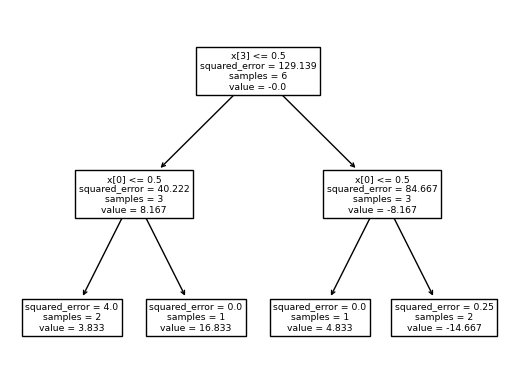

In [40]:
tree.plot_tree(clf)

In [41]:
y = clf.predict(x)

In [42]:
y

array([ 16.83333333,   4.83333333, -14.66666667,   3.83333333,
         3.83333333, -14.66666667])

,Height,Weight,pred,residual,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Female,Gender_Male
0,1.6,88,71.166667,16.833333,True,False,False,False,True
1,1.6,76,71.166667,4.833333,False,True,False,True,False
2,1.5,56,71.166667,-15.166667,True,False,False,True,False
3,1.8,73,71.166667,1.833333,False,False,True,False,True
4,1.5,77,71.166667,5.833333,False,True,False,False,True
5,1.4,57,71.166667,-14.166667,True,False,False,True,False


In [44]:
df['pred_weight'] = df['pred'] + clf.predict(x) 

In [45]:
df

,Height,Weight,pred,residual,Fav Color_Blue,Fav Color_Green,Fav Color_Red,Gender_Female,Gender_Male,pred_weight
0,1.6,88,71.166667,16.833333,True,False,False,False,True,88.0
1,1.6,76,71.166667,4.833333,False,True,False,True,False,76.0
2,1.5,56,71.166667,-15.166667,True,False,False,True,False,56.5
3,1.8,73,71.166667,1.833333,False,False,True,False,True,75.0
4,1.5,77,71.166667,5.833333,False,True,False,False,True,75.0
5,1.4,57,71.166667,-14.166667,True,False,False,True,False,56.5
